# Generate "transmission errors" in time series

These are errors that affects time index, for example: repeating values x(t) several times, dropping value x(t), or switching x(t) with x(t+1), etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from badgers.generators.time_series.transmission_errors import RandomTimeSwitchGenerator, RandomRepeatGenerator, RandomDropGenerator
import matplotlib.patches as patches

## Setup random generator

In [2]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Import data (using sktime)

In [3]:
from sktime.datasets import load_airline

In [4]:
X = load_airline()
t = X.index.to_timestamp()

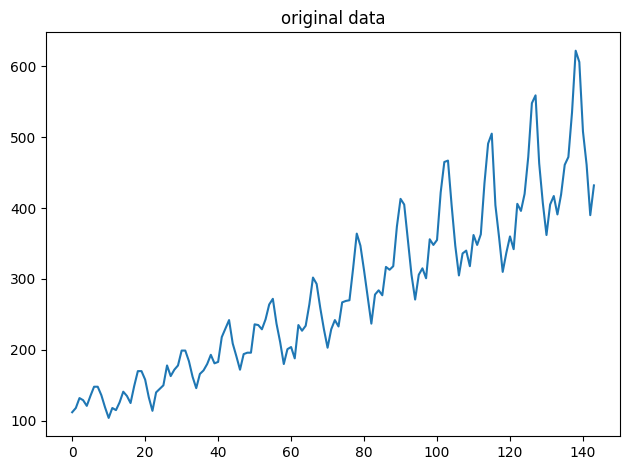

In [5]:
fig, ax = plt.subplots()
ax.plot(X.values)
ax.set_title('original data')
plt.tight_layout()

## Generating random switches in time

Where x[i] and x[i+1] are switched

In [6]:
generator = RandomTimeSwitchGenerator(random_generator=rng)
Xt, y = generator.generate(X=X.copy(), y=None, n_switches=20)

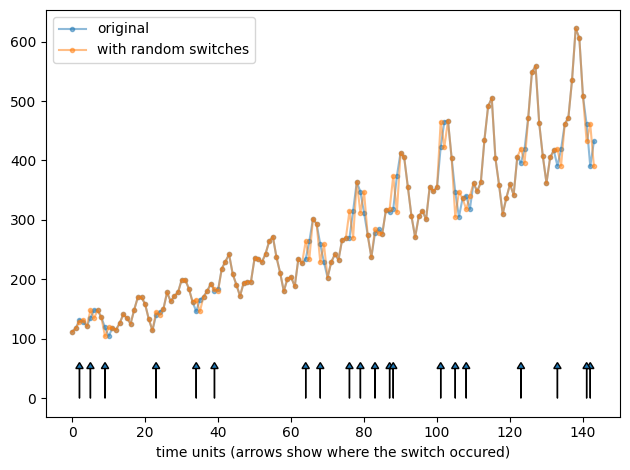

In [7]:
fig, ax = plt.subplots()
ax.plot(X.values, alpha=0.5, ls='-', marker='.', label='original')
ax.plot(Xt.values, alpha=0.5, ls='-', marker='.', label='with random switches')
ax.set_xlabel('time units (arrows show where the switch occured)')
for i in generator.switch_indices_:
    ax.arrow(i,0,0,50, head_width=2, head_length=10)

plt.legend()
plt.tight_layout()

## Add random repeats (equivalent to delays)

Where x[i] is repeated for some time

In [8]:
generator = RandomRepeatGenerator(random_generator=rng)
Xt, y = generator.generate(X=X.copy(), y=None, n_repeats=5, min_nb_repeats=3, max_nb_repeats=10)

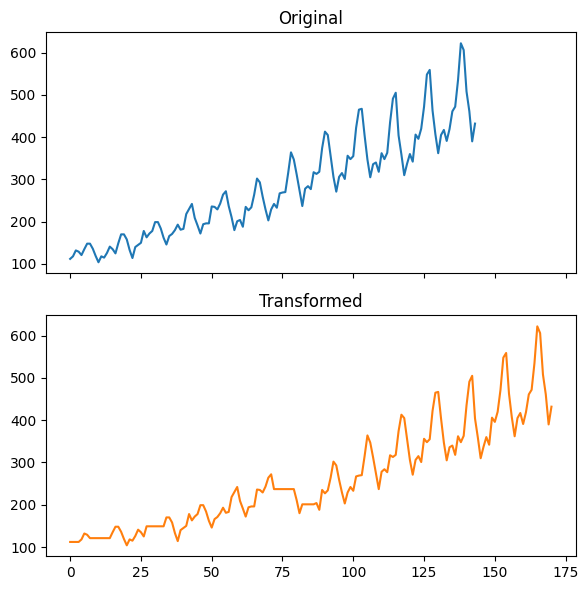

In [9]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(X.values, color='C0')
axes[1].plot(Xt.values, color='C1')
axes[0].set_title('Original')
axes[1].set_title('Transformed')
plt.tight_layout()

## Randomly dropping values

This is different from missingness as in missingness the time index in not affected

In [14]:
generator = RandomDropGenerator(random_generator=rng)
Xt, y = generator.generate(X=X.copy(), y=None, n_drops=10)

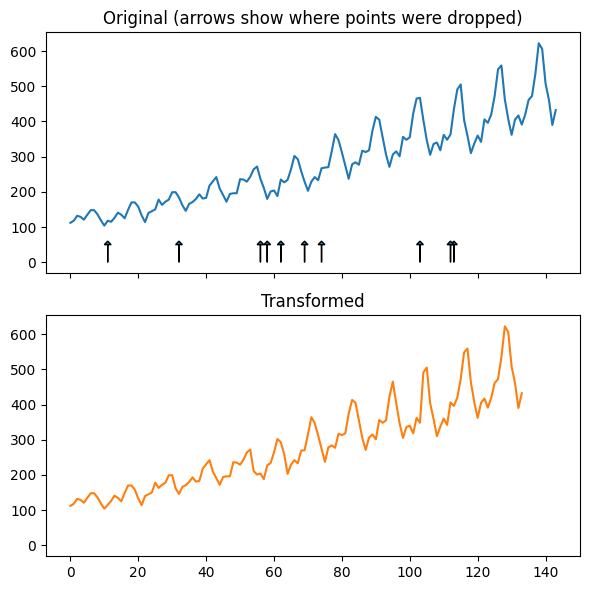

In [15]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(X.values, color='C0')
axes[1].plot(Xt.values, color='C1')
axes[0].set_title('Original (arrows show where points were dropped)')
axes[1].set_title('Transformed')

for i in generator.drops_indices_:
    axes[0].arrow(i,0,0,50, head_width=2, head_length=10)

plt.tight_layout()